In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset.csv')

df_download_media = df[(df.Tipo == "Download")]

df_download_media

,Unnamed: 0,Operatore,Profilo,Velocità (down/up),Territorio,Periodo,Tipo,Media,Dev. Std.,Min,Max,TP%,Misure,Anno
0,0,Acantho,BigBand,"\n7,0Mbps512.0kbps\n",Nazionale,\nGen2014Giu2014\n,Download,"5,4Mbps","969,4","3,3Mbps","6,2Mbps",NaN,43900,2014
3,3,Acantho,BigBand,"\n20,0Mbps1,0Mbps\n",Nazionale,\nGen2014Giu2014\n,Download,"13,2Mbps","1398,1","10,5Mbps","15,0Mbps",NaN,43860,2014
6,6,Aruba,ADSL20Mb/384kb,"\n20,0Mbps384.0kbps\n",Nazionale,\nGen2014Giu2014\n,Download,"15,4Mbps",1744,"13,0Mbps","17,6Mbps",NaN,107140,2014
9,9,Aruba,ADSL7Mb/384kb,"\n7,0Mbps384.0kbps\n",Nazionale,\nGen2014Giu2014\n,Download,"6,7Mbps","326,8","6,2Mbps","6,8Mbps",NaN,108122,2014
12,12,Brennercom,AllesKlar,"\n8,0Mbps384.0kbps\n",Nazionale,\nGen2014Giu2014\n,Download,"7,7Mbps",64,"7,7Mbps","7,7Mbps",NaN,43840,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,941,Wind,"WindHomeADSL,3ADSL,AbsoluteADSL,AllInclusive,A...","\n12,0Mbps1,0Mbps\n",Nazionale,\nLug2022Dic2022\n,Download,"13,6Mbps","6543,8","11,8Mbps",NaN,NaN,8505,2022
942,942,Wind,"WindHomeADSL,3ADSL,AbsoluteADSL,AllInclusive,A...","\n14,0Mbps1,0Mbps\n",Nazionale,\nLug2022Dic2022\n,Download,"11,6Mbps","820,3","10,8Mbps",NaN,NaN,18045,2022
943,943,Wind,"WindHomeADSL,3ADSL,AbsoluteADSL,AllInclusive,A...","\n17,0Mbps1,0Mbps\n",Nazionale,\nLug2022Dic2022\n,Download,"15,0Mbps","31,7","15,0Mbps",NaN,NaN,9020,2022
944,944,Wind,"WindHomeADSL,3ADSL,AbsoluteADSL,AllInclusive,A...","\n20,0Mbps1,0Mbps\n",Nazionale,\nLug2022Dic2022\n,Download,"17,6Mbps","2327,6","16,2Mbps",NaN,NaN,33352,2022


In [13]:
import re
m = []
for i in range(0, len(df_download_media)):
    m.append(float(re.findall("[-+]?(?:\d*\,*\d+)", df_download_media.iloc[i].Media)[0].replace(',','.')))
df_download_media["media_f"] = m
df_download_media = df_download_media.drop(["Unnamed: 0","Profilo","Velocità (down/up)","Territorio","Periodo","Tipo","Media","Dev. Std.","Min","Max","TP%","Misure"],axis = 1)
df_download_media = df_download_media.groupby(["Operatore","Anno"]).mean().reset_index()
df_download_media


/tmp/ipykernel_196/970307678.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_download_media["media_f"] = m


,Operatore,Anno,media_f
0,Acantho,2014,9.275000
1,Acantho,2015,9.425000
2,Acantho,2016,9.150000
3,Acantho,2018,9.525000
4,Acantho,2019,10.550000
...,...,...,...
140,Wind,2018,12.030769
141,Wind,2019,16.060000
142,Wind,2020,24.500000
143,Wind,2021,24.842857


Acantho
2014
2015
2016
2017
2018
2019
2020
2021
2022
[9.274999999999999, 9.425, 9.15, nan, 9.525, 10.55, 9.8, 8.85, 9.025]
[2014 2015 2016 2017 2018 2019 2020 2021 2022]
Aruba
2014
2015
2016
2017
2018
2019
2020
2021
2022
[11.1, 11.15, 10.5, 10.5, 11.85, 11.450000000000001, nan, 13.299999999999999, 776.15]
[2014 2015 2016 2017 2018 2019 2020 2021 2022]
Brennercom
2014
2015
2016
2017
2018
2019
2020
2021
2022
[4.8, 4.8, 4.8, nan, 5.074999999999999, 5.05, 5.05, 5.05, 4.824999999999999]
[2014 2015 2016 2017 2018 2019 2020 2021 2022]
BritishTelecom
2014
2015
2016
2017
2018
2019
2020
2021
2022
[5.725, 6.0, 7.133333333333333, 8.6, 8.683333333333334, 9.0, 8.475, 8.983333333333334, 8.35]
[2014 2015 2016 2017 2018 2019 2020 2021 2022]
ColtTelecom
2014
2015
2016
2017
2018
2019
2020
2021
2022
[5.4, 5.300000000000001, nan, nan, nan, nan, nan, nan, nan]
[2014 2015 2016 2017 2018 2019 2020 2021 2022]
EnelEnergia
2014
2015
2016
2017
2018
2019
2020
2021
2022
[nan, nan, nan, nan, nan, nan, nan, 691.6, 72

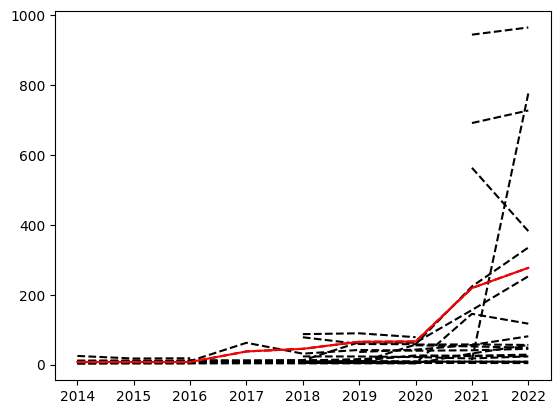

In [14]:
import matplotlib.pyplot as plt
anni = np.sort(df_download_media.Anno.unique())
tim_velocita = []
for operatore in df_download_media.Operatore.unique():
    print(operatore)
    velocita = []
    for anno in anni:
        print(anno)
        media_anno = df_download_media[(df_download_media.Operatore == operatore) & (df_download_media.Anno == anno)].media_f.values
        if len(media_anno) == 0:
            velocita.append(np.nan)
        else:
            velocita.append(media_anno[0])
    print(velocita)
    print(anni)
    if(operatore == "TIM"):
        tim_velocita = velocita
    
    plt.plot(anni, velocita, 'k--')
plt.plot(anni, tim_velocita, 'r-')